# Show contributions to ComBind Score in a Heiracrchical Fashion

In [1]:
from scoring import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prot = 'TRPV1'
stats = 'stats30/stats'
scores = 'stats30/best_affinity_diverse/standard/20-1.0-mcss_contact_hbond_sb'
fname = '5IRX_lig-to-3J5Q.sc'
struct = '3J5Q'

print('results {0}/scores/{1}/{2}, {0}, {3}, confgen_es4'.format(prot, scores, fname, struct))

cluster, glide_cluster, best_cluster, sc = load(prot, stats, scores, fname, struct)

results TRPV1/scores/stats30/best_affinity_diverse/standard/20-1.0-mcss_contact_hbond_sb/5IRX_lig-to-3J5Q.sc, TRPV1, 3J5Q, confgen_es4


# Statistics for calculation

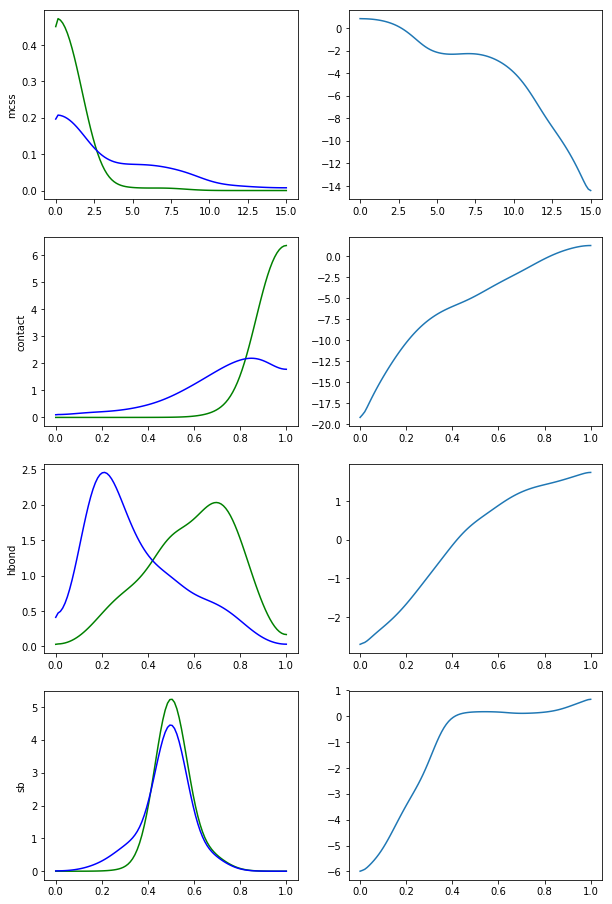

In [3]:
stats_plot(sc)

# Interactions

ComBind v. Glide for sb
ComBind - Glide: 0.0
ComBind v. Best for sb
ComBind - Glide: 0.0
ComBind v. Glide for hbond
ComBind - Glide: inf
ComBind v. Best for hbond
ComBind - Glide: inf
ComBind v. Glide for contact
ComBind - Glide: inf
ComBind v. Best for contact


/Users/jpaggi/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)


ComBind - Glide: inf


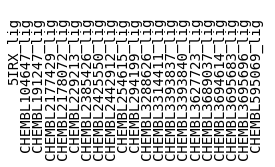

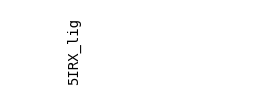

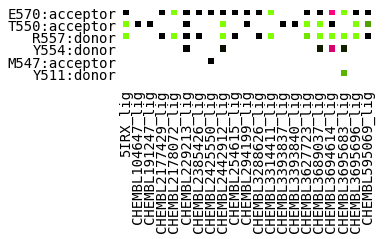

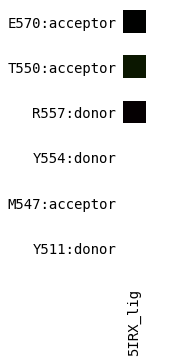

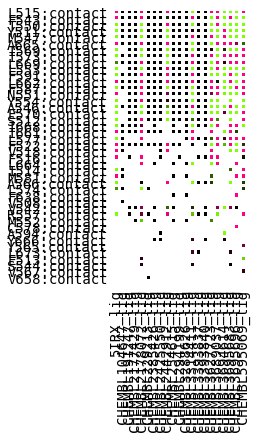

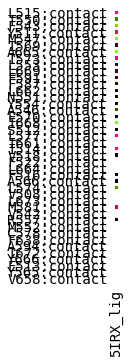

In [4]:
ligands = list(cluster)
for feature in ['sb', 'hbond', 'contact']:
    print('ComBind v. Glide for {}'.format(feature))
    sc.ps.gel_plot(cluster, {k: 0 for k, v in cluster.items()}, feature, ligands)
    print('ComBind v. Best for {}'.format(feature))
    sc.ps.gel_plot(cluster, best_cluster, feature, ['5IRX_lig'])

ComBind v. Glide for sb
ComBind - Glide: 0.0
ComBind v. Best for sb
ComBind - Glide: 0.0
ComBind v. Glide for hbond
ComBind - Glide: inf
ComBind v. Best for hbond
ComBind - Glide: inf
ComBind v. Glide for contact
ComBind - Glide: inf
ComBind v. Best for contact
ComBind - Glide: inf


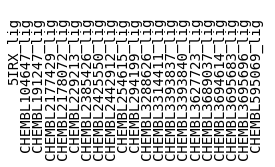

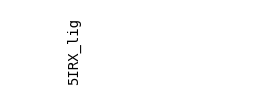

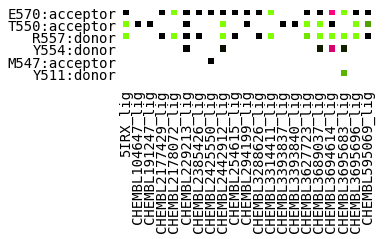

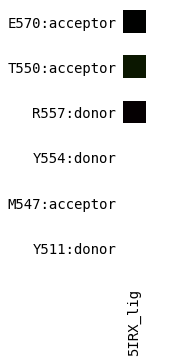

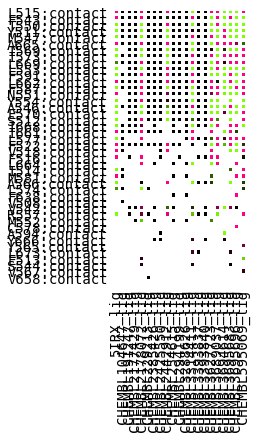

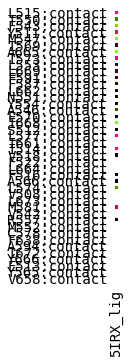

In [5]:
ligands = list(cluster)
for feature in ['sb', 'hbond', 'contact']:
    print('ComBind v. Glide for {}'.format(feature))
    sc.ps.gel_plot(cluster, {k: 0 for k, v in cluster.items()}, feature, ligands)
    print('ComBind v. Best for {}'.format(feature))
    sc.ps.gel_plot(cluster, best_cluster, feature, ['5IRX_lig'])

# Energy Differences

Cluster1 - Cluster2 = 56.985827775698894 for mcss


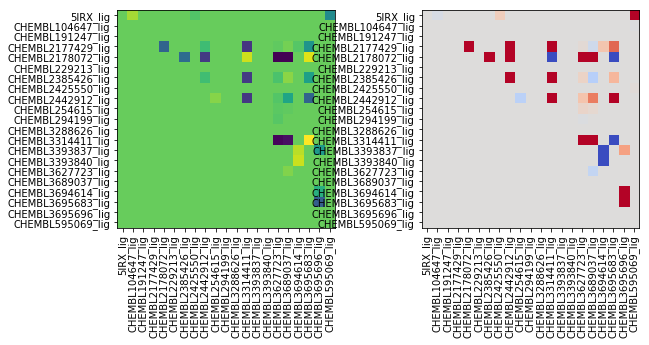

AssertionError: 

In [6]:
energy_plot(cluster, glide_cluster, sc)

In [ ]:
# Likelihood of ComBind - best in context of ComBind

ligand = '5IRX_lig'
pose = 0
mut = {k:v for k, v in cluster.items()}
mut[ligand] = pose

energy_plot(cluster, mut, sc)

In [ ]:
for i, pose in enumerate(sc.predict_data.docking['3J5Q'].ligands['5IRX_lig'].poses):
    print(i, pose.gscore, pose.rmsd)

In [ ]:
sc.ps.log_likelihood_ratio_cache = {}
sc.ps.alpha = 0.48
sc.ps._best_pose(cluster, '5IRX_lig', 0)

In [ ]:
for _, pp in sc.ps.lig_pairs.items():
    pp.mode = 'tanimoto'
sc.ps.features.remove('contact')

In [ ]:
-2.134 - 3.07 - 7.54

In [ ]:
1.15 * 20

In [ ]:
3+5+40